# Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report

# Loading data file and printing the first five records

In [2]:
mat_df = pd.read_csv('student-mat.csv')
mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
por_df = pd.read_csv('student-por.csv')
por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
# Merge the two datasets
merged_df = pd.concat([mat_df, por_df])

# Remove duplicates
merged_df = merged_df.drop_duplicates()

print("Merged and deduplicated data:")
print(merged_df.head())

Merged and deduplicated data:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


# Diagnosis

In [5]:
# Count number of columns
num_columns = merged_df.shape[1]
print(f"Number of columns: {num_columns}")

# Check for null values in each column
null_counts = merged_df.isnull().sum()
print("\nNull values in each column:")
print(null_counts)

Number of columns: 33

Null values in each column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [6]:
#'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
#'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
#'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', G3'

In [7]:
print(merged_df['school'].unique())
print(merged_df['sex'].unique())

['GP' 'MS']
['F' 'M']


# Codify categorical data to numerical data

In [8]:
coded_df = merged_df
coded_df['school'] = coded_df['school'].map({'GP': 0, 'MS': 1})
coded_df['sex'] = coded_df['sex'].map({'M': 0, 'F': 1})
coded_df['address'] = coded_df['address'].map({'U': 0, 'R': 1})
coded_df['famsize'] = coded_df['famsize'].map({'LE3': 0, 'GT3': 1})
coded_df['Pstatus'] = coded_df['Pstatus'].map({'T': 0, 'A': 1})
coded_df['Mjob'] = coded_df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
coded_df['Fjob'] = coded_df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
coded_df['reason'] = coded_df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
coded_df['guardian'] = coded_df['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
coded_df['schoolsup'] = coded_df['schoolsup'].map({'no': 0, 'yes': 1})
coded_df['famsup'] = coded_df['famsup'].map({'no': 0, 'yes': 1})
coded_df['paid'] = coded_df['paid'].map({'no': 0, 'yes': 1})
coded_df['activities'] = coded_df['activities'].map({'no': 0, 'yes': 1})
coded_df['nursery'] = coded_df['nursery'].map({'no': 0, 'yes': 1})
coded_df['higher'] = coded_df['higher'].map({'no': 0, 'yes': 1})
coded_df['internet'] = coded_df['internet'].map({'no': 0, 'yes': 1})
coded_df['romantic'] = coded_df['romantic'].map({'no': 0, 'yes': 1})
coded_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,6,5,6,6
1,0,1,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,4,5,5,6
2,0,1,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,10,7,8,10
3,0,1,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,1,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,4,6,10,10


## Heat Map

<Axes: >

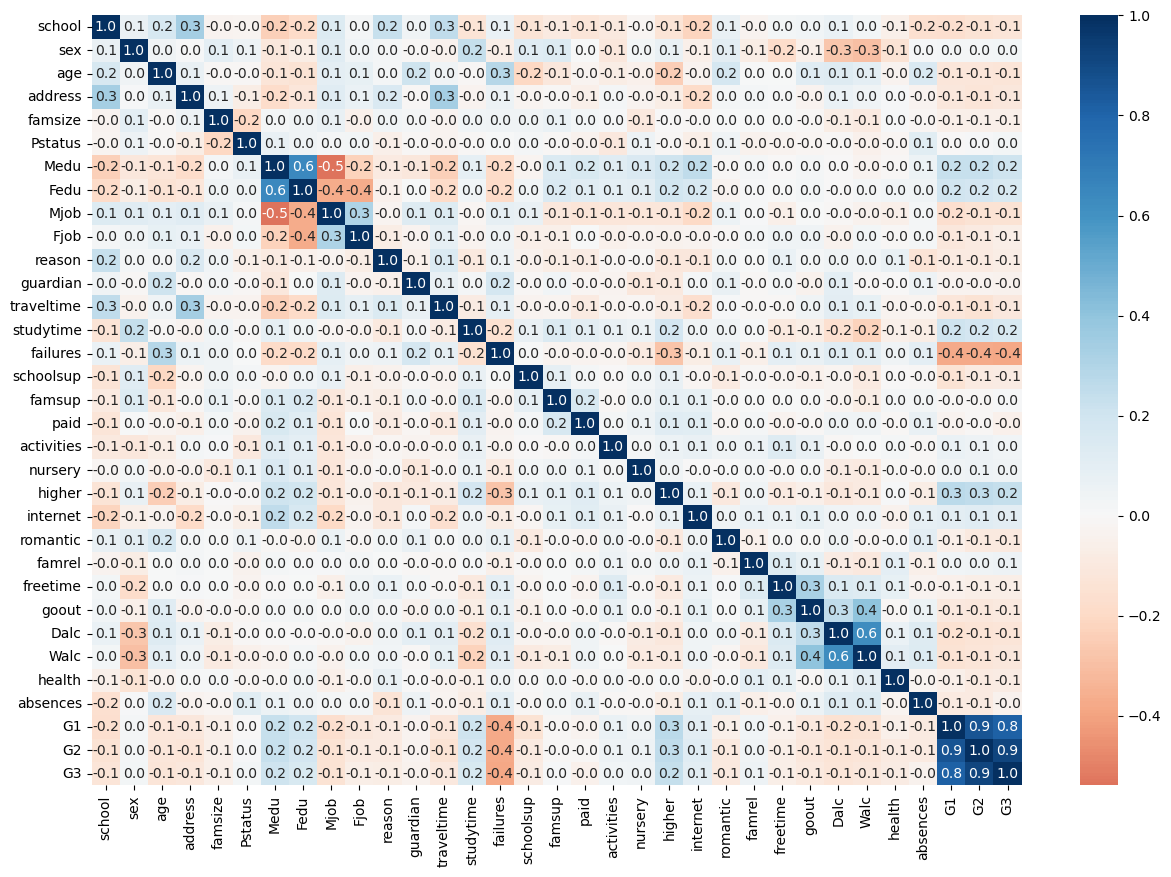

In [9]:
#Initiate Correlation
corr = coded_df.corr()
# Include information about values (example demonstrates how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

# PCA

In [10]:
# Choose features to reduce via PCA
features_to_pca = ['G1', 'G2', 'G3']

# Input chosen features in an object
X_pca_input = merged_df[features_to_pca]

# Standardize the features stored in object
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# Apply PCA - we can keep 1 or 2 components to reduce dimensionality
# Transform the standardized features
pca = PCA(n_components=1)
X_pca_component = pca.fit_transform(X_scaled)

# Convert to DataFrame for merging
X_pca_df = pd.DataFrame(X_pca_component, columns=['PCA_grading'])

coded_df['PCA_grading'] = X_pca_df

coded_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,PCA_grading
0,0,1,18,0,1,1,4,4,3,0,...,3,4,1,1,3,6,5,6,6,-2.917766
1,0,1,17,0,1,0,1,1,3,4,...,3,3,1,1,3,4,5,5,6,-3.096971
2,0,1,15,0,0,0,1,1,3,4,...,3,2,2,3,3,10,7,8,10,-1.581721
3,0,1,15,0,1,0,4,2,1,2,...,2,2,1,1,5,2,15,14,15,1.758856
4,0,1,16,0,1,0,3,3,4,4,...,3,2,1,2,5,4,6,10,10,-1.413002


# Regression Model

## Split the data into training (80%) and testing (20%)

In [11]:
# Define features and targets
X_re = merged_df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 
'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 
'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'Dalc', 'Walc']]

y_re = merged_df['G3']

# Splitting data for training
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(X_re, y_re, 
                                                test_size=0.2, random_state=42)

In [12]:
reg = LinearRegression()
reg.fit(X_re_train, y_re_train)
y_re_pred = reg.predict(X_re_test)

## Plotting Actual vs. Prediction

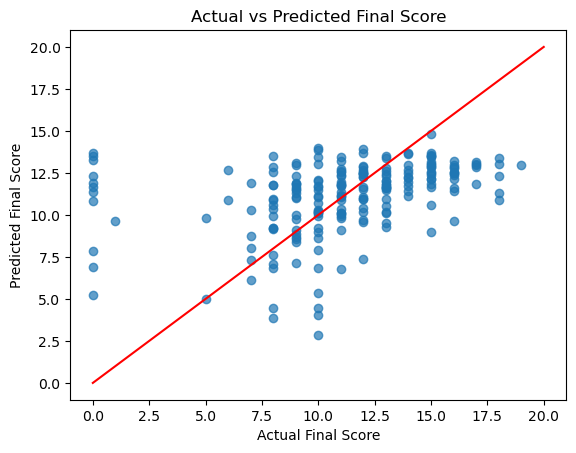

In [13]:
plt.scatter(y_re_test, y_re_pred, alpha=0.7)
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Actual vs Predicted Final Score')
plt.plot([y_re.min(), y_re.max()], [y_re.min(), y_re.max()], color='red')
plt.show()

## Evaluation

In [14]:
print("R² Score:", r2_score(y_re_test, y_re_pred))
print("MAE:", mean_absolute_error(y_re_test, y_re_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_re_test, y_re_pred)))

R² Score: 0.09963772160623141
MAE: 2.661299625754793
RMSE: 3.7309968513288565


# KNN Model

## Split the data into training (80%) and testing (20%)

In [15]:
# Classification label: pass if Final_Score >= 50
coded_df['status'] = coded_df['G3'].apply(lambda x: 0 if x > 10 else 1)
print(coded_df.head(5))

# Define features and targets
X_knn = coded_df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 
'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 
'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'Dalc', 'Walc', 
'PCA_grading']]

y_knn = coded_df['status']

# Splitting data for training
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, 
                                                test_size=0.2, random_state=42)

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    1   18        0        1        1     4     4     3     0  ...   
1       0    1   17        0        1        0     1     1     3     4  ...   
2       0    1   15        0        0        0     1     1     3     4  ...   
3       0    1   15        0        1        0     4     2     1     2  ...   
4       0    1   16        0        1        0     3     3     4     4  ...   

   goout  Dalc  Walc  health  absences  G1  G2  G3  PCA_grading  status  
0      4     1     1       3         6   5   6   6    -2.917766       1  
1      3     1     1       3         4   5   5   6    -3.096971       1  
2      2     2     3       3        10   7   8  10    -1.581721       1  
3      2     1     1       5         2  15  14  15     1.758856       0  
4      2     1     2       5         4   6  10  10    -1.413002       1  

[5 rows x 35 columns]


In [16]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_knn_train, y_knn_train)
y_knn_pred = knn.predict(X_knn_test)

## Evaluation

In [17]:
print("KNN Accuracy:", accuracy_score(y_knn_test, y_knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_knn_test, y_knn_pred))
print("F1-Score:", f1_score(y_knn_test, y_knn_pred,average='weighted'))
#Bonus
# Precision and Recall
precision = precision_score(y_knn_test, y_knn_pred, average='binary')  # change average param if multi-class
recall = recall_score(y_knn_test, y_knn_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

KNN Accuracy: 0.7033492822966507
Confusion Matrix:
 [[106  16]
 [ 46  41]]
F1-Score: 0.6886881686631975
Precision: 0.7193
Recall: 0.4713


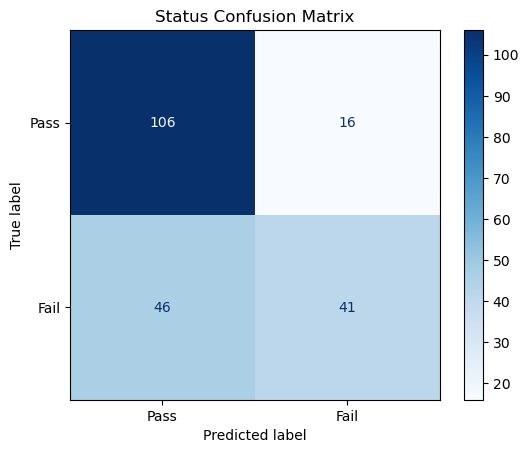

In [18]:
cm = confusion_matrix(y_knn_test, y_knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pass','Fail'])
disp.plot(cmap='Blues')
plt.title(f"{'Status'} Confusion Matrix")
plt.show()

# Naive Bayes Model

In [19]:
#Binarize
coded_df['Dalc_level'] = coded_df['Dalc'].apply(lambda x: 1 if x >= 3 else 0)
coded_df['Walc_level'] = coded_df['Walc'].apply(lambda x: 1 if x >= 3 else 0)
# Define features and targets
X_nb = coded_df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 
'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 
'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'PCA_grading']]
y_dalc = coded_df['Dalc_level']
y_walc = coded_df['Walc_level']

## Dalc Prediction

In [20]:
# Splitting & training for Dalc
X_nb_train, X_nb_test, y_dalc_train, y_dalc_test = train_test_split(X_nb, y_dalc, test_size=0.2, random_state=42)
nb = GaussianNB()
nb.fit(X_nb_train, y_dalc_train)
y_dalc_pred = nb.predict(X_nb_test)

In [21]:
# Evaluation 
print("Naive Bayes Classification Report:", classification_report(y_dalc_test, y_dalc_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_dalc_test, y_dalc_pred))
print("F1-Score:", f1_score(y_dalc_test, y_dalc_pred, average='weighted'))

Naive Bayes Classification Report:               precision    recall  f1-score   support

           0       0.93      0.85      0.89       190
           1       0.18      0.32      0.23        19

    accuracy                           0.80       209
   macro avg       0.55      0.58      0.56       209
weighted avg       0.86      0.80      0.83       209

Naive Bayes Accuracy: 0.8038277511961722
F1-Score: 0.8275570384642497


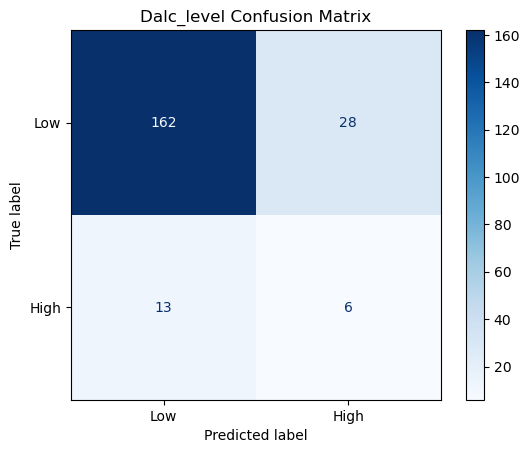

In [22]:
cm = confusion_matrix(y_dalc_test, y_dalc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
disp.plot(cmap='Blues')
plt.title(f"{'Dalc_level'} Confusion Matrix")
plt.show()

## Walc Prediction

In [23]:
# Splitting & training for Walc
X_nb_train, X_nb_test, y_walc_train, y_walc_test = train_test_split(X_nb, y_walc, test_size=0.2, random_state=42)
nb = GaussianNB()
nb.fit(X_nb_train, y_walc_train)
y_walc_pred = nb.predict(X_nb_test)

In [24]:
# Evaluation 
print("Naive Bayes Classification Report:", classification_report(y_walc_test, y_walc_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_walc_test, y_walc_pred))
print("F1-Score:", f1_score(y_walc_test, y_walc_pred, average='weighted'))

Naive Bayes Classification Report:               precision    recall  f1-score   support

           0       0.74      0.75      0.75       134
           1       0.54      0.52      0.53        75

    accuracy                           0.67       209
   macro avg       0.64      0.64      0.64       209
weighted avg       0.67      0.67      0.67       209

Naive Bayes Accuracy: 0.6698564593301436
F1-Score: 0.6683150104618906


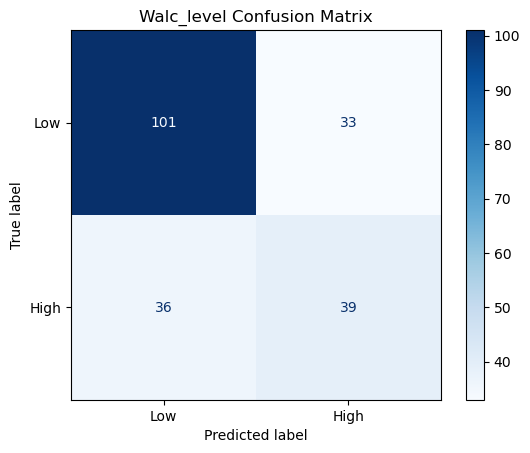

In [25]:
cm = confusion_matrix(y_walc_test, y_walc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
disp.plot(cmap='Blues')
plt.title(f"{'Walc_level'} Confusion Matrix")
plt.show()

# Decision Tree

In [30]:
# Define features and targets
X_dt = coded_df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 
'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'Dalc', 'Walc']]
y_dt = coded_df['G3']

# Splitting data for training
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, 
                                                test_size=0.2, random_state=42)

In [34]:
# Initialize and train decision tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)  # CART = Gini Index
dt_model.fit(X_dt_train, y_dt_train)

# Predict
y_dt_pred = dt_model.predict(X_dt_test)

## Evaluation

In [35]:
print("Accuracy:", accuracy_score(y_dt_test, y_dt_pred))
print("Classification Report:\n", classification_report(y_dt_test, y_dt_pred))

# Feature importance
print("Feature Importances:")
for name, importance in zip(X_dt_train.columns, dt_model.feature_importances_):
    print(f"{name}: {importance:.4f}")

Accuracy: 0.13875598086124402
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.36      0.32        11
           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6
           8       0.12      0.06      0.08        18
           9       0.00      0.00      0.00        20
          10       0.19      0.30      0.23        27
          11       0.23      0.36      0.28        25
          12       0.08      0.09      0.09        22
          13       0.06      0.24      0.10        21
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00        20
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         5
          19       0.00    

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualize Tree

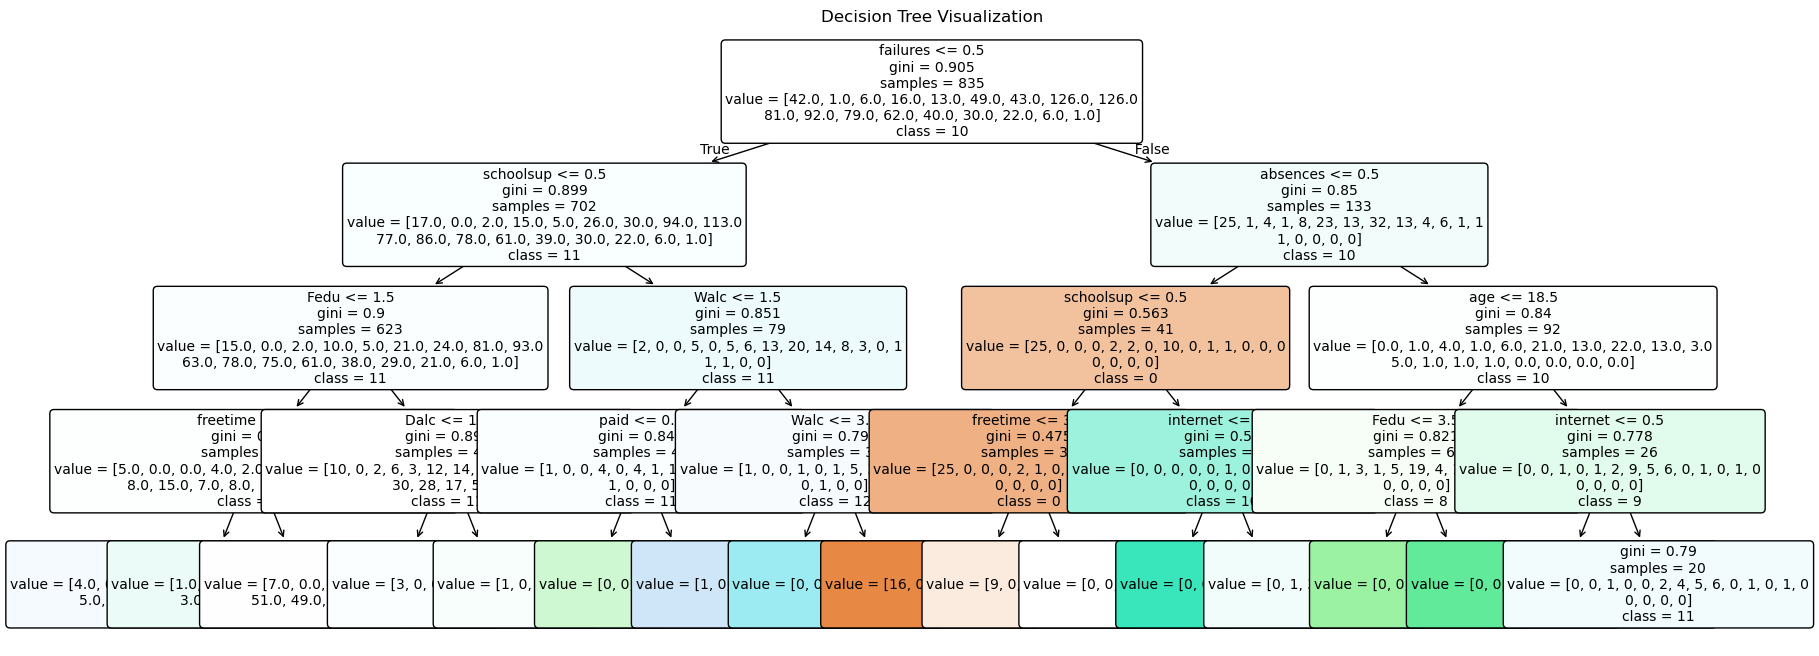

In [40]:
plt.figure(figsize=(20,8))
plot_tree(
    dt_model, 
    feature_names=X_dt_test.columns, 
    class_names=[str(c) for c in dt_model.classes_],  # Convert class names to strings
    filled=True, 
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()